```
Our objective is to leverage advanced machine learning techniques to predict the variety of date fruits, empowering farmers and agricultural stakeholders to improve classification accuracy and streamline post-harvest processes. Your role is to analyze various morphological, colorimetric, and textural attributes of date fruits to build predictive models that distinguish different varieties effectively.

Dataset Description
You have been provided with a comprehensive dataset containing morphological and colorimetric features of different varieties of date fruits. The dataset includes the following attributes:

Morphological Attributes:
AREA: Surface area of the date fruit.
PERIMETER: Perimeter measurement around the fruit.
MAJOR_AXIS: Length of the major axis of the date fruit.
MINOR_AXIS: Length of the minor axis of the date fruit.
ECCENTRICITY: Ratio describing the shape of the fruit based on the axes.
EQDIASQ: Equivalent diameter of a circle with the same area as the fruit.
SOLIDITY: Ratio of the area to the convex hull area.
CONVEX_AREA: Area of the smallest convex polygon that can contain the fruit.
EXTENT: Ratio of the area to the bounding box area.
ASPECT_RATIO: Ratio of the major axis to the minor axis.
ROUNDNESS: Measure of how circular the fruit is.
COMPACTNESS: Measure of how compact or dense the fruit is.
Shape Factor Attributes:
SHAPEFACTOR_1: Ratio of the perimeter squared to 4π times the area.
SHAPEFACTOR_2: Ratio of 4π times the area to the perimeter squared.
SHAPEFACTOR_3: Ratio of the major axis to the equivalent diameter.
SHAPEFACTOR_4: Ratio of the minor axis to the equivalent diameter.
Colorimetric Attributes:
MeanRR: Mean intensity of the red color channel.
MeanRG: Mean intensity of the green color channel.
MeanRB: Mean intensity of the blue color channel.
StdDevRR: Standard deviation of the red color channel.
StdDevRG: Standard deviation of the green color channel.
StdDevRB: Standard deviation of the blue color channel.
SkewRR: Skewness of the red color channel.
SkewRG: Skewness of the green color channel.
SkewRB: Skewness of the blue color channel.
KurtosisRR: Kurtosis of the red color channel.
KurtosisRG: Kurtosis of the green color channel.
KurtosisRB: Kurtosis of the blue color channel.
EntropyRR: Entropy of the red color channel.
EntropyRG: Entropy of the green color channel.
EntropyRB: Entropy of the blue color channel.
Daubechies Wavelet Attributes:
ALLdaub4RR: Wavelet-transformed feature of the red color channel.
ALLdaub4RG: Wavelet-transformed feature of the green color channel.
ALLdaub4RB: Wavelet-transformed feature of the blue color channel.
Target Attribute:
Class: The variety or class of the date fruit.
Check this Date Fruit Vlog to see the images of these dates
Your task is to utilize Support Vector Machines (SVMs) to predict the "Class" of each date fruit and identify the most influential features contributing to accurate classification. This project will help streamline the sorting and grading processes in the agricultural industry, offering practical insights to farmers and other stakeholders.
```

In [1]:
!wget -nc -P ../data/ "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/070/671/original/Date_Fruit_Datasets.zip"

File ‘../data/Date_Fruit_Datasets.zip’ already there; not retrieving.



In [7]:
if not os.path.exists('../data/Date_Fruit_Datasets'):
    !unzip ../data/Date_Fruit_Datasets.zip -d ../data/

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
df= pd.read_excel(r'../data/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [6]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [12]:
print(f"there are {df['Class'].nunique()} classes")
print(df['Class'].value_counts())

there are 7 classes
Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64


```
Feature Correlation Analysis
Context:
Support Vector Machines (SVM) are sensitive to highly correlated features, especially when using linear kernels. Such correlations can negatively affect the model’s generalization ability and potentially lead to overfitting.

Task:
Calculate the Pearson correlation coefficients among 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', and 'COMPACTNESS'. These insights will help in understanding the interdependencies among features that are critical to SVM performance.

Instructions:
Calculate Correlation Matrix: Use the dataset to calculate the Pearson correlation matrix for the specified features.
Visualize Correlation Matrix: Create a heatmap to visualize the correlations between features, which will help identify which pairs are most correlated.
Question:
Based on the heatmap, which pair of features shows the highest correlation? Discuss the potential impact of this correlation on SVM classification and suggest how to mitigate negative effects.

Options:
A) 'PERIMETER' and 'MAJOR_AXIS'
B) 'MAJOR_AXIS' and 'MINOR_AXIS'
C) 'MINOR_AXIS' and 'COMPACTNESS'
D) 'PERIMETER' and 'COMPACTNESS'
```

Text(0.5, 1.0, 'Heatmap of Pearson correlation among features')

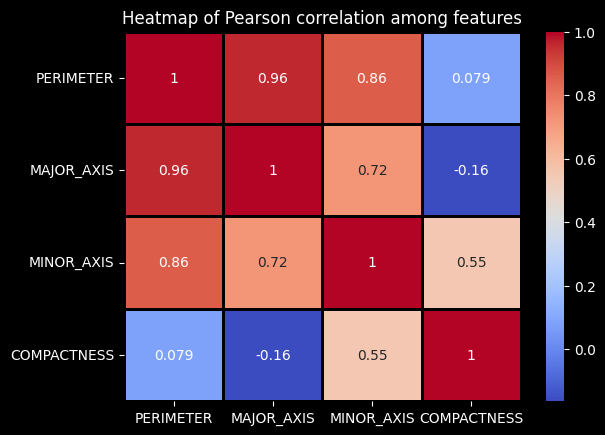

In [22]:
features = ['PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'COMPACTNESS']

correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', linewidth= 2, linecolor= 'black')
plt.title('Heatmap of Pearson correlation among features')

```
Evaluating SVM Precision with Feature Scaling
Context:
Support Vector Machine (SVM) is sensitive to the scale of the data, which can significantly impact its performance. This question aims to explore the effect of feature scaling on SVM classification accuracy and precision for each class.

Task:
After applying feature scaling, identify the class with the lowest precision in an SVM classification task. The SVM model uses a linear kernel.

Instructions:
Prepare Data:

Split the dataset into training and test sets using train_test_split with test_size=0.3 and random_state=42.
Extract features (X) and the target variable (y) from the dataset.
Feature Scaling:

Scale the features using StandardScaler.
Train SVM:

Train a Support Vector Machine with a linear kernel on the scaled training data.
Evaluate the Model:

Predict the target variable on the scaled test set.
Generate a classification report to review the precision scores for each class.
Question:
After training an SVM with a linear kernel on scaled data, which class in the classification report exhibits the lowest precision?

Options:
(A) SAFAVI

(B) IRAQI

(C) ROTANA

(D) DEGLET
```